

https://www.kaggle.com/ambarish/retinal-oct-image-analysis/data

https://www.kaggle.com/paultimothymooney/kermany2018/kernels



https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist


# Importing Libraries and loading Dataset

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
import cv2
%matplotlib inline

In [27]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("Dataset"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'val']


In [28]:
from os import listdir

In [29]:
# list types of classes 
listdir('Dataset/val')
listdir('Dataset/test')
listdir('Dataset/train')

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [30]:
val_path = 'Dataset/val/'
test_path = 'Dataset/test/'
train_path = 'Dataset/train/'

Step Two : Plot Data

In [31]:
listdir(train_path + 'NORMAL')[0:10]

['NORMAL-1001772-1.jpeg',
 'NORMAL-1014193-4.jpeg',
 'NORMAL-1014715-10.jpeg',
 'NORMAL-1014715-11.jpeg',
 'NORMAL-1014715-3.jpeg',
 'NORMAL-1014715-4.jpeg',
 'NORMAL-1015755-12.jpeg',
 'NORMAL-101880-2.jpeg',
 'NORMAL-1027133-1.jpeg',
 'NORMAL-1027133-2.jpeg']

In [32]:
listdir(train_path + 'CNV')[0:10]

['CNV-1016042-219.jpeg',
 'CNV-1016042-220.jpeg',
 'CNV-1016042-221.jpeg',
 'CNV-103044-148.jpeg',
 'CNV-103044-149.jpeg',
 'CNV-103044-23.jpeg',
 'CNV-103044-5.jpeg',
 'CNV-103044-6.jpeg',
 'CNV-1083927-1.jpeg',
 'CNV-1083927-104.jpeg']

In [33]:
listdir(train_path + 'DME')[0:10]

['DME-1072015-1.jpeg',
 'DME-1083927-4.jpeg',
 'DME-1083927-5.jpeg',
 'DME-1083927-9.jpeg',
 'DME-1141111-1.jpeg',
 'DME-1141111-2.jpeg',
 'DME-1141111-3.jpeg',
 'DME-1163718-1.jpeg',
 'DME-1163718-2.jpeg',
 'DME-1591159-65.jpeg']

In [34]:
listdir(train_path + 'DRUSEN')[0:10]

['DRUSEN-1001666-1.jpeg',
 'DRUSEN-100580-1.jpeg',
 'DRUSEN-103885-1.jpeg',
 'DRUSEN-103885-2.jpeg',
 'DRUSEN-103885-3.jpeg',
 'DRUSEN-103885-4.jpeg',
 'DRUSEN-103885-5.jpeg',
 'DRUSEN-142234-10.jpeg',
 'DRUSEN-142234-11.jpeg',
 'DRUSEN-142234-12.jpeg']

# Take an image from is class to visualise

In [35]:
train_normal_image = cv2.imread(train_path + 'NORMAL/NORMAL-1001772-1.jpeg')
train_normal_image.shape, train_normal_image.dtype

# convert ot grey scale
img_normal_gry = rgb2gray(train_normal_image)
img_normal_gry.shape, img_normal_gry.dtype

((496, 512), dtype('float64'))

# HOG Features

In [82]:

import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

def hog_img(train_normal_image):

    fd, hog_image = hog(train_normal_image, orientations=8, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(train_normal_image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

    hog_image_rescaled.shape

# Visualize Normal image along with its HOG

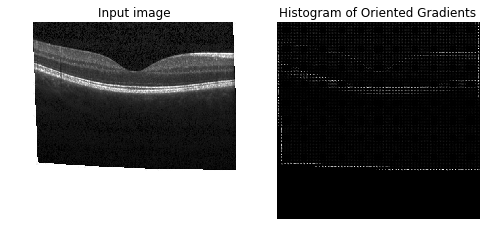

In [93]:
train_normal_image = cv2.imread(train_path + 'NORMAL/NORMAL-1027133-2.jpeg')
img_normal_gry = rgb2gray(train_normal_image)

hog_img(img_normal_gry)
#hog_img(train_normal_image )

# Visualize CNV image along with its HOG

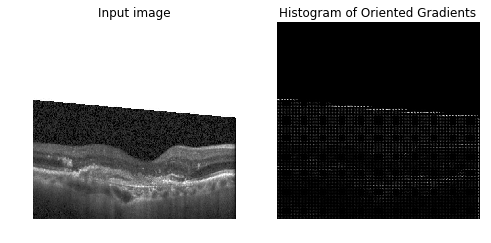

((496, 512), dtype('float64'))

In [98]:
train_cnv_image = cv2.imread(train_path + 'CNV/CNV-1016042-219.jpeg')


# convert ot grey scale
img_cnv_gry = rgb2gray(train_cnv_image)
hog_img(img_cnv_gry)
img_cnv_gry.shape, img_cnv_gry.dtype

# Visualize Normal image along with its HOG

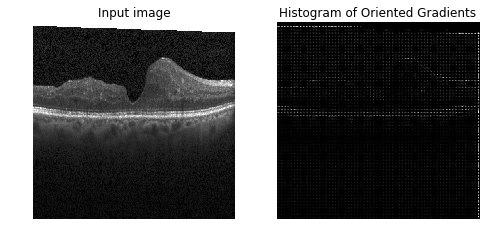

((496, 512), dtype('float64'))

In [99]:
train_dme_image = cv2.imread(train_path + 'DME/DME-1072015-1.jpeg')


# convert ot grey scale
img_dme_gry = rgb2gray(train_dme_image)
hog_img(img_dme_gry)
img_dme_gry.shape, img_dme_gry.dtype

# Visualize Drusen image along with its HOG

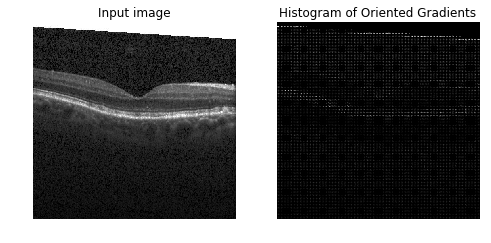

((496, 512), dtype('float64'))

In [100]:
train_drusen_image = cv2.imread(train_path + 'DRUSEN/DRUSEN-1001666-1.jpeg')

train_drusen_image.shape, train_drusen_image.dtype

# convert ot grey scale
img_drusen_gry = rgb2gray(train_drusen_image)
hog_img(img_drusen_gry)

img_drusen_gry.shape, img_drusen_gry.dtype

(-0.5, 511.5, 495.5, -0.5)

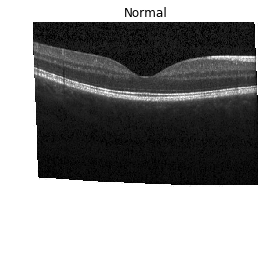

In [101]:
plt.imshow(img_normal_gry ,cmap='gray')
plt.title('Normal')
plt.axis('off')

Local Histogram Equalization
http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html#local-histogram-equalization




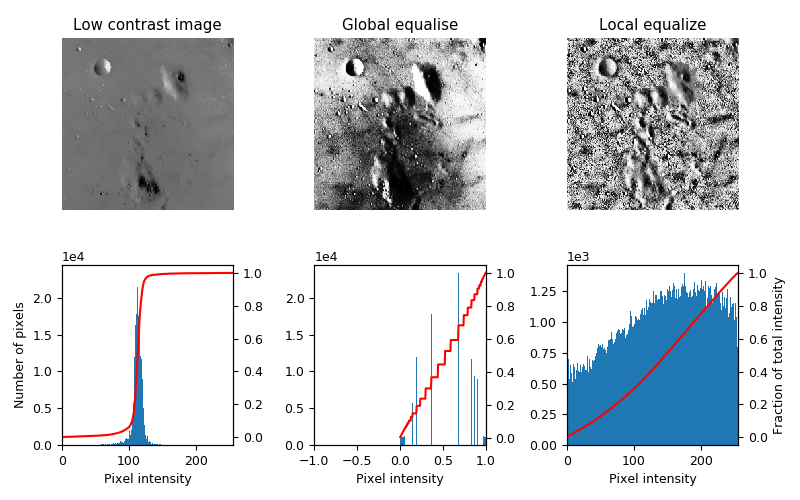

# Histogram Equalization

In [102]:


from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [103]:
def display_result(input_image, input_suptitle): # input_suptitle subplot title
    # Load an example image
    img = img_as_ubyte(input_image)

    # Contrast stretching
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

    # Equalization
    img_eq = exposure.equalize_hist(img)
    
    hog_img(img_eq)
    

    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)


    # Display results
    fig = plt.figure(figsize=(8, 5))
    fig.suptitle (input_suptitle, va = 'bottom',fontweight = 'bold',fontsize = 'large') # subplot title
    axes = np.zeros((2, 3), dtype=np.object)
    axes[0, 0] = plt.subplot(2, 3, 1)
    axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
    axes[1, 0] = plt.subplot(2, 3, 4)
    axes[1, 1] = plt.subplot(2, 3, 5)
    axes[1, 2] = plt.subplot(2, 3, 6)

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
    ax_img.set_title('Low contrast image')
    ax_hist.set_ylabel('Number of pixels')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
    ax_img.set_title('Global equalise')

    ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
    ax_img.set_title('Local equalize')
    ax_cdf.set_ylabel('Fraction of total intensity')


    # prevent overlap of y-axis labels
    fig.tight_layout()
    plt.show()

# Normal

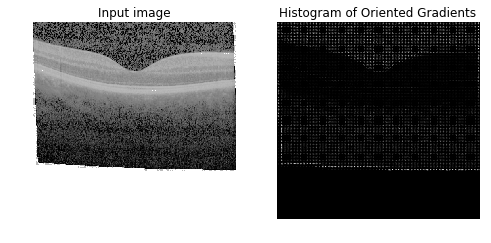

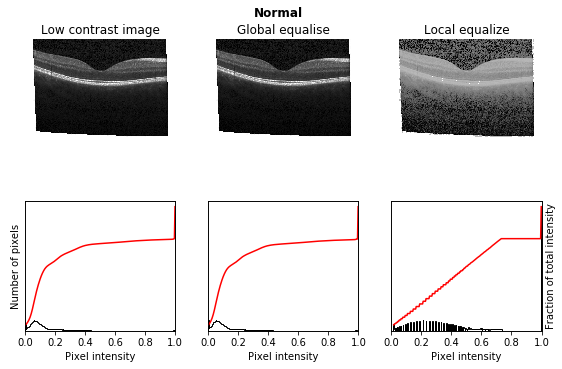

In [104]:
display_result(img_normal_gry, 'Normal')

# Drusen

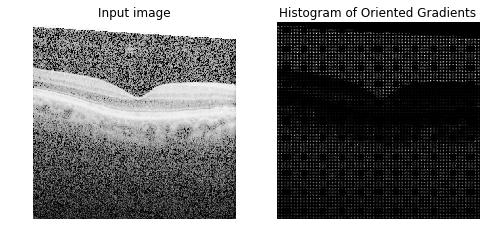

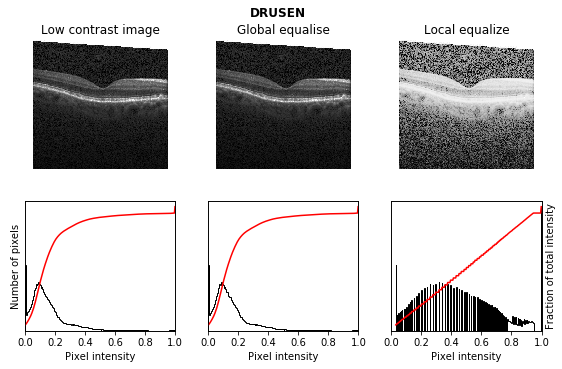

In [88]:
display_result(img_drusen_gry, 'DRUSEN')

# CNV

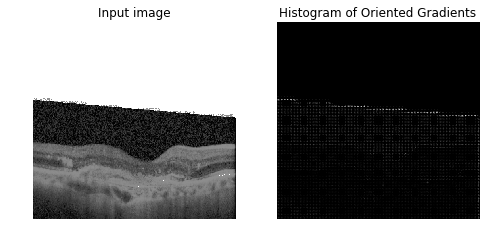

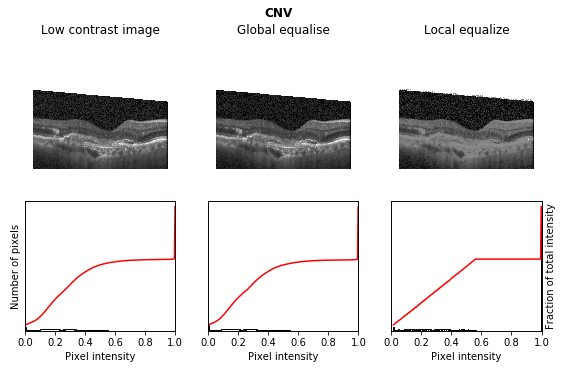

In [89]:
display_result(img_cnv_gry, 'CNV') 

# DME

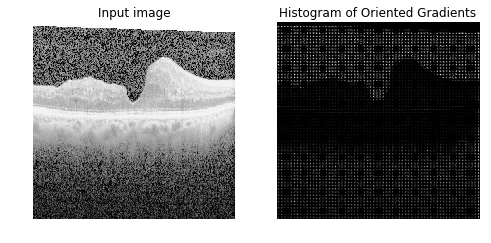

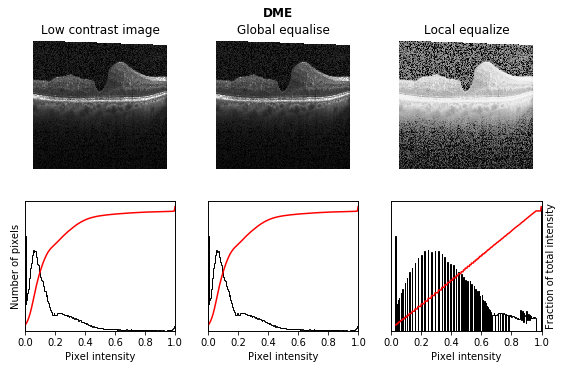

In [90]:
display_result(img_dme_gry, 'DME') 